In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv("winequality-red.csv")
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


**Get the Data**

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Data Preprocessing**

In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Exploratory Data Analysis**

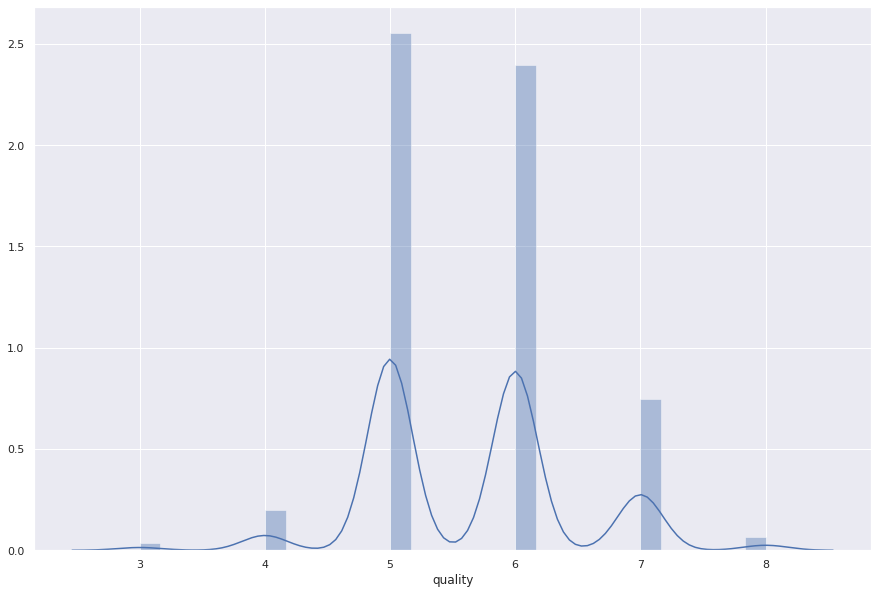

In [ ]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df['quality'])


In [ ]:
sns.pairplot(df)

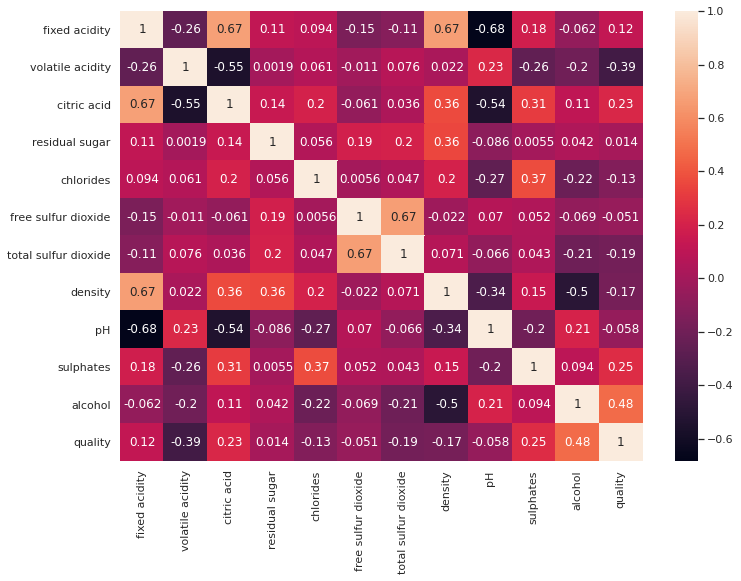

In [ ]:

sns.heatmap(adm.corr(), annot=True)


In [ ]:
x = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']].values
y = df['quality'].values.reshape(-1,1)


print(x.shape)

print(y.shape)

(1599, 11)
(1599, 1)


In [ ]:
from sklearn.model_selection import train_test_split
print(X.shape)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1599, 11)
(1279, 11)
(320, 11)
(1279, 1)
(320, 1)


**Training the model**

In [ ]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#To retrieve the intercept:
print(lin_model.intercept_)  #theta0
#For retrieving the slope:
print(lin_model.coef_)    #theta1 & theta2

[34.99871063]
[[ 4.12835075e-02 -1.14952802e+00 -1.77927063e-01  2.78700036e-02
  -1.87340739e+00  2.68362616e-03 -2.77748370e-03 -3.15166657e+01
  -2.54486051e-01  9.24040106e-01  2.67797417e-01]]


**Predicting Test Data**

In [ ]:
y_pred = lin_model.predict(X_test)
print(y_pred.flatten())

[5.7829301  5.03619267 6.59698929 5.33912637 5.93952898 5.0072068
 5.39616171 6.05211188 4.86760343 4.95067572 5.28580441 5.41265269
 5.7057424  5.12921737 5.52885206 6.38052412 6.81012527 5.73803346
 5.97618825 5.08613415 6.34479863 5.16400983 5.64203971 6.1462903
 5.4817802  5.03391406 5.18721293 6.48783659 5.33301372 6.30458308
 6.03452293 5.82849303 5.58503524 5.28512701 5.75656128 6.15273792
 5.14134479 5.48228021 6.38983359 5.7901819  5.42936928 6.04810414
 6.70159678 6.60160183 5.97253803 4.78890763 5.49565005 6.01881894
 5.48895041 6.10824243 5.3126164  5.28492351 5.76043226 6.36081498
 5.7195388  5.26971928 5.08498332 5.31050693 6.50895816 5.44323413
 5.16377401 5.76427324 6.0703837  6.28933679 5.07315141 6.11874641
 5.35681067 6.01343647 6.12184268 5.98547673 5.35327968 5.4367731
 5.06017324 5.58939889 5.62593935 6.25651326 5.37875073 5.31024191
 5.72008022 6.30275434 5.71093253 5.27783285 5.89582077 6.0876033
 5.50616533 5.37465715 6.2437351  5.07332478 5.32665801 4.97398339

In [ ]:
df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,6,5.782930
1,5,5.036193
2,7,6.596989
3,6,5.339126
4,5,5.939529
...,...,...
315,6,6.559757
316,4,6.017576
317,5,6.251291
318,4,5.163926


In [ ]:
df1 = df.head(25)

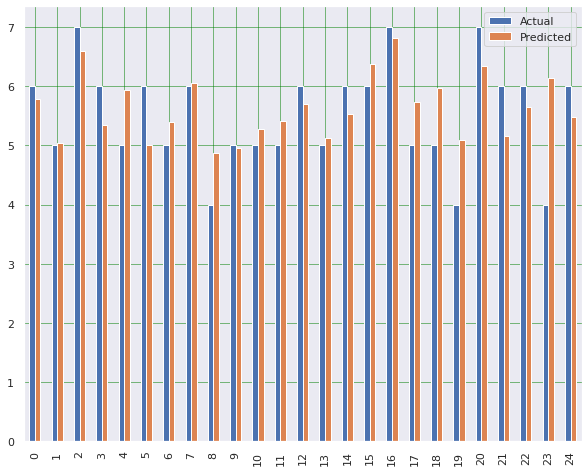

In [ ]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
#print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
#accuracy=lin_model.score(X_test,Y_test)
#print(accuracy)

Mean Squared Error: 0.3844711978201226
Root Mean Squared Error: 0.6200574149384254
